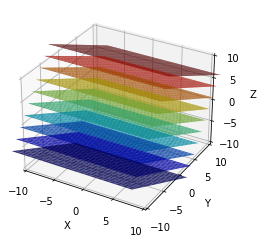

In [37]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm
from pylab import meshgrid,linspace,zeros,dot,norm,cross,vstack,array,matrix,sqrt



def rotmatrix(axis,costheta):
    """ Расчёт матрицы вращения

    Аргументы:
    - `axis`     : Ось вращения
    - `costheta` : Угол поворота
    """
    x,y,z = axis
    c = costheta
    s = sqrt(1-c*c)
    C = 1-c
    return  matrix([[ x*x*C+c,    x*y*C-z*s,  x*z*C+y*s ],
                    [ y*x*C+z*s,  y*y*C+c,    y*z*C-x*s ],
                    [ z*x*C-y*s,  z*y*C+x*s,  z*z*C+c   ]])

def plane(Lx,Ly,Nx,Ny,n,d):
    """ Вычислим точки общей плоскости

    Аргументы:
    - `Lx` : Длина плоскости в первом направлении
    - `Ly` : Длина плоскости во втором направлении
    - `Nx` : Количество точек в первом направлении
    - `Ny` : Количество точек во втором направлении
    - `n`  : Ориентация плоскости - вектор нормали
    - `d`  : Расстояние от начала координат
    """

    x = linspace(-Lx/2,Lx/2,Nx)
    y = linspace(-Ly/2,Ly/2,Ny)
    # Сетки плоскости XY находящейся в начале координат
    X,Y = meshgrid(x,y)
    Z   = zeros([Nx,Ny])
    n0 = array([0,0,1])

    # Поворот плоскост к заданному вектору нормали
    if any(n0!=n):
        costheta = dot(n0,n)/(norm(n0)*norm(n))
        axis     = cross(n0,n)/norm(cross(n0,n))
        rotMatrix = rotmatrix(axis,costheta)
        XYZ = vstack([X.flatten(),Y.flatten(),Z.flatten()])
        X,Y,Z = array(rotMatrix*XYZ).reshape(3,Nx,Ny)

    dVec = (n/norm(n))*d
    X,Y,Z = X+dVec[0],Y+dVec[1],Z+dVec[2]
    return X,Y,Z


if __name__ == "__main__":

    # Количество плоскостей (от 1 до n)
    Nplanes = 10

    # Список цветов из cmap
    colorList = cm.jet(linspace(0,1,Nplanes))

    # Расстояние между плоскостями
    distList = linspace(-10,10,Nplanes)

    # Ориентация плоскости - вектор нормали
    normalVector = array([0,0.6,1]) # Y direction

    # Создание фигуры
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    # Plotting
    for i,ypos in enumerate(linspace(-10,10,10)):

        # Расчёт плоскости
        X,Y,Z = plane(20,20,100,100,normalVector,distList[i])

        ax.plot_surface(X, Y, Z, rstride=5, cstride=5,
                        alpha=0.8, color=colorList[i])

    # Параметры отображения графика   
    ax.set_xlabel('X')
    ax.set_xlim(-10, 10)
    ax.set_ylabel('Y')
    ax.set_ylim(-10, 10)
    ax.set_zlabel('Z')
    ax.set_zlim(-10, 10)

    plt.show()